In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
############################################################
'''
Part 1: RK4 Validation with simple spring-damper model + PID control
'''
############################################################

## parameter setup
# Integration parameter 
h=1/100  # step size    (sec)
t0=0    # initial time (sec)
tf=10    # final time (sec)


time=np.linspace(t0,tf,int((tf-t0)/h))

## motion initial state
x_t0=1.0
v_t0=0
a_t0=0

x_target=3.0         # height target [m]

motion_t0=np.array([x_t0,v_t0])
motion_t=np.zeros((len(motion_t0),len(time)))


## PID parameters
kp=0.5
ki=1.0
kd=1.5

integral=0   # initialize the integral
lasterr=0    # for the kd  

In [3]:
# Butcher Array
RK4matrix=np.array([
      [0,0,0,0],
      [1/4,1/4,0,0],
      [27/40,-189/800,729/800,0],       
      [1,214/891,1/33,650/891],       
      [214/891,1/33,650/891,0],      
   ])


def rk4_ex(f,t,x,h,*args):  #*args allows unknown number of arguments
   k1=f(t+h*RK4matrix[0][0],x+h*RK4matrix[0][1],*args)
   k2=f(t+h*RK4matrix[1][0],x+h*k1*RK4matrix[1][1],*args)
   k3=f(t+h*RK4matrix[2][0],x+h*k2*RK4matrix[2][1],*args)
   k4=f(t+h*RK4matrix[3][0],x+h*k3*RK4matrix[3][1],*args)

   xnext=x+h*(k1*RK4matrix[4][0]+k2*RK4matrix[4][1]+k3*RK4matrix[4][2]+k4*RK4matrix[4][3])
   return xnext



def dx(t,motion,dotm,ve,*args):
   #xdot=motion[1]
   #xdotdot=5
   
   xdot=motion[1]
   xdotdot=-3.0*(motion[0]-x_target)-1.5*motion[1]+dotm
   return np.array([xdot,xdotdot])

def PID(x,h,kp,ki,kd):
   global integral, lasterr

   err=x-x_target
   integral=integral+ki*err*h
   derr=(err-lasterr)/h
   
   lasterr=err

   return -(kp*err+kd*derr+ki*integral)


def stateupdate(t,h,motion):
   
   x=motion[0]

   md4n=PID(x,h,kp,ki,kd)
   ve=2.5
   motion_n=rk4_ex(dx,t,motion,h,md4n,ve)


   return motion_n

In [4]:
# Main iteration loop
motion_ti=motion_t0


for ti in range(len(time)-1):
    #
    t=time[ti]



    # calculte the new value (RK4/Algebraic update)
    motion_ti=stateupdate(t,h,motion_ti)

    #store the step
    motion_t[:,ti]=motion_ti

    #print(f'Step {t} of {len(time)-1}'.format())


print("last position is", motion_t[0,-2])

last position is 3.009608646199762


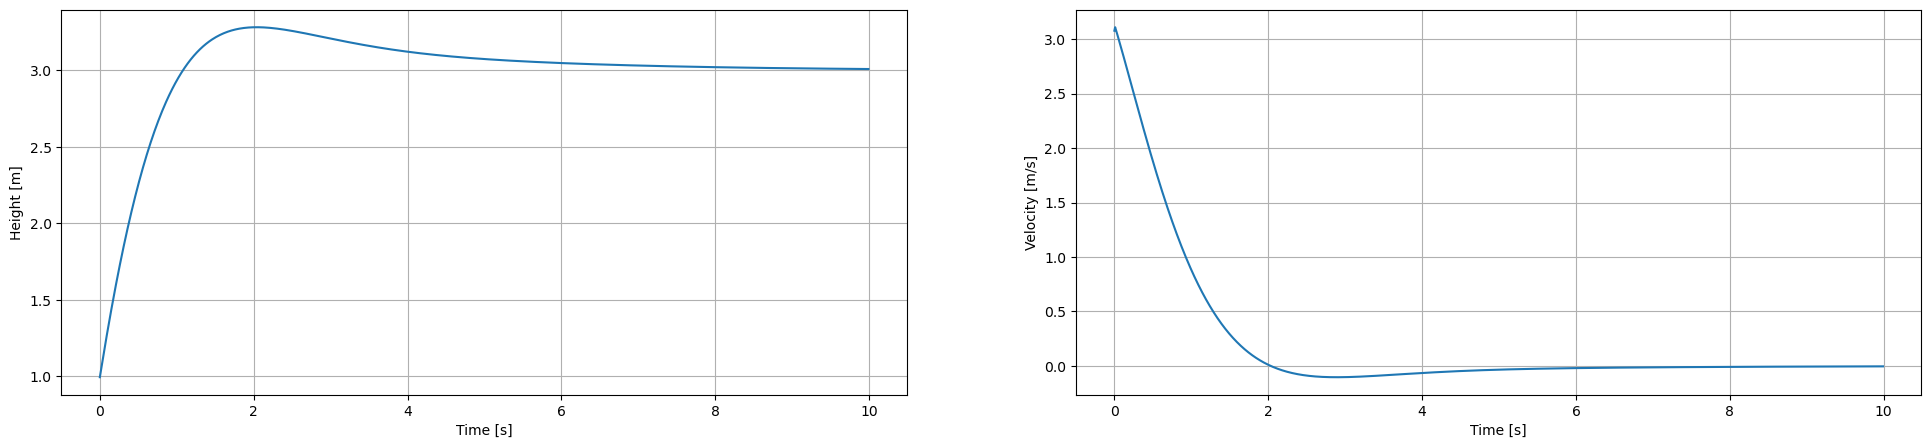

In [5]:
# Visualization

# part 3: motion
plt.figure(figsize=(24,5))
plt.subplot(121)
plt.plot(time[:-1], motion_t[0, :-1], label='x')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()


plt.subplot(122)
plt.plot(time[:-1], motion_t[1, :-1], label='v')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

In [16]:
############################################################
'''
Part 2: RK4 Validation with rocket dynamic + PID control
'''
# Now we introduce the rocket dynamic here
############################################################

## parameter setup
# Integration parameter 
h=1/1000  # step size    (sec)
t0=0    # initial time (sec)
tf=10    # final time (sec)


time=np.linspace(t0,tf,int((tf-t0)/h))

## motion initial state
x_t0=0.0
v_t0=0
a_t0=0

x_target=4.0         # height target [m]

motion_t0=np.array([x_t0,v_t0])
motion_t=np.zeros((len(motion_t0),len(time)))

## mass
m_hop=3.5    # mass of hopper [kg]
m_hose=1     # mass of hose   [kg]
k_hose=6     # variable hopper mass [N/m]
F_RR=10      # rolling resistence [N]

## constant
R=8314            # universal gas constant [J/kmol*K]
M=28.013           # nitrogen gas  [kg/kmol]
gamma=1.4          # ratio of specific heats (diatomic gas)
g=9.81             # [m/s^2]

## Nozzle
Th_d=9e-3                        # throat diameter [m]
Th_exit_d=11e-3                  # exit diameter [m]
A_throat=np.pi*(Th_d/2)**2      #[m^2]
A_e=np.pi*(Th_exit_d/2)**2      #[m^2]
epsilon=A_e/A_throat            #expansion ratio
T_4=273                         # nozzle inlet temperature [k]


## Mach number
Me=1.8486328125000004        # from the main file, no longer do iteration

## PID parameters (gain has to be larger since the step size is really small)
kp=45
ki=10
kd=33

integral=0   # initialize the integral
lasterr=0    # for the kd  

prev_pose=x_t0


md4n_term=A_throat / np.sqrt(T_4*R/(M*gamma)) * np.power((gamma+1)/2, -(gamma+1)/(2*(gamma-1)))
print(md4n_term)
print(A_throat)
print(np.sqrt(T_4*R/(M*gamma)))
print(np.power((gamma+1)/2, -(gamma+1)/(2*(gamma-1))))

1.5303425617273556e-07
6.36172512351933e-05
240.5705743928359
0.5787037037037037


In [23]:
# Butcher Array
RK4matrix=np.array([
      [0,0,0,0],
      [1/4,1/4,0,0],
      [27/40,-189/800,729/800,0],       
      [1,214/891,1/33,650/891],       
      [214/891,1/33,650/891,0],      
   ])


def rk4_ex(f,t,x,h,*args):  #*args allows unknown number of arguments
   k1=f(t+h*RK4matrix[0][0],x+h*RK4matrix[0][1],*args)
   k2=f(t+h*RK4matrix[1][0],x+h*k1*RK4matrix[1][1],*args)
   k3=f(t+h*RK4matrix[2][0],x+h*k2*RK4matrix[2][1],*args)
   k4=f(t+h*RK4matrix[3][0],x+h*k3*RK4matrix[3][1],*args)

   xnext=x+h*(k1*RK4matrix[4][0]+k2*RK4matrix[4][1]+k3*RK4matrix[4][2]+k4*RK4matrix[4][3])
   return xnext



def dx(t,motion,dotm,ve,*args):
   xdot=motion[1]
   xdotdot=dotm*ve/m_hop-g-F_RR/m_hop*np.sign(motion[1])-k_hose/m_hose*xdot*h   # the last term (hose) assumes that the hose become the damping term

   return np.array([xdot,xdotdot])

def PID(x,h,kp,ki,kd):
   global integral, lasterr
  
   err=x-x_target
   integral=integral+ki*err*h
   derr=(err-lasterr)/h
   
   lasterr=err

   PIDlaw=-(kp*err+kd*derr+ki*integral)
   #print("error: ",err, "integral: ", integral, "derror: ",derr)

   if PIDlaw<1:
      output=1
   elif PIDlaw>11:
      output=11
   else:
      output=PIDlaw

   return output


def stateupdate(t,h,motion):
   
   x=motion[0]
   
   p4n=PID(x,h,kp,ki,kd)*1e5                                                       # control input (modify once deploy the controller)
   md4n=A_throat*p4n/(np.sqrt(T_4*R/(M*gamma)))*np.power((gamma+1)/2,-(gamma+1)/(2*(gamma-1)))

   # Nozzle exit
   pe=p4n/np.power(1+((gamma-1)/2*Me**2), gamma/(gamma-1))                         #exit pressure (use the assumption of p_4/p_ambient>1.8)
   ve=np.sqrt((2*gamma*R*T_4)/(gamma-1)/M*(1-np.power(pe/p4n,(gamma-1)/gamma)))    #exit velocity

   #print("ve",ve)

   print("ve: ",ve,"pe: ",pe," p4: ",p4n, "md4n", md4n)

   # update the motion
   motion_n=rk4_ex(dx,t,motion,h,md4n,ve,prev_pose)

   print("x: ",motion_n[0])

   return motion_n


md4n_term=A_throat / np.sqrt(T_4*R/(M*gamma)) * np.power((gamma+1)/2, -(gamma+1)/(2*(gamma-1)))
print(md4n_term)

1.5303425617273556e-07


In [24]:
# Main iteration loop
motion_ti=motion_t0


for ti in range(len(time)):
    #
    t=time[ti]

    # calculte the new value (RK4/Algebraic update)
    motion_ti=stateupdate(t,h,motion_ti)

    #store the step
    motion_t[:,ti]=motion_ti
    
    prev_pose=motion_t[0,ti-1] if ti>0 else x_t0
   
    #print(f'Step {t} of {len(time)-1}'.format())


print("last position is", motion_t[0,-1])

ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  -1.6940503269538061e-06
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  1.1857693760628445e-05
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  3.582188356021834e-05
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  7.019845659707983e-05
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  0.00011498735039685174
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  0.00017018850248554774
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  0.0002358018503895563
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.16833768179000907
x:  0.0003118273316356408
ve:  479.8617142065833 pe:  177687.55275170016  p4:  1100000.0 md4n 0.1683376817900

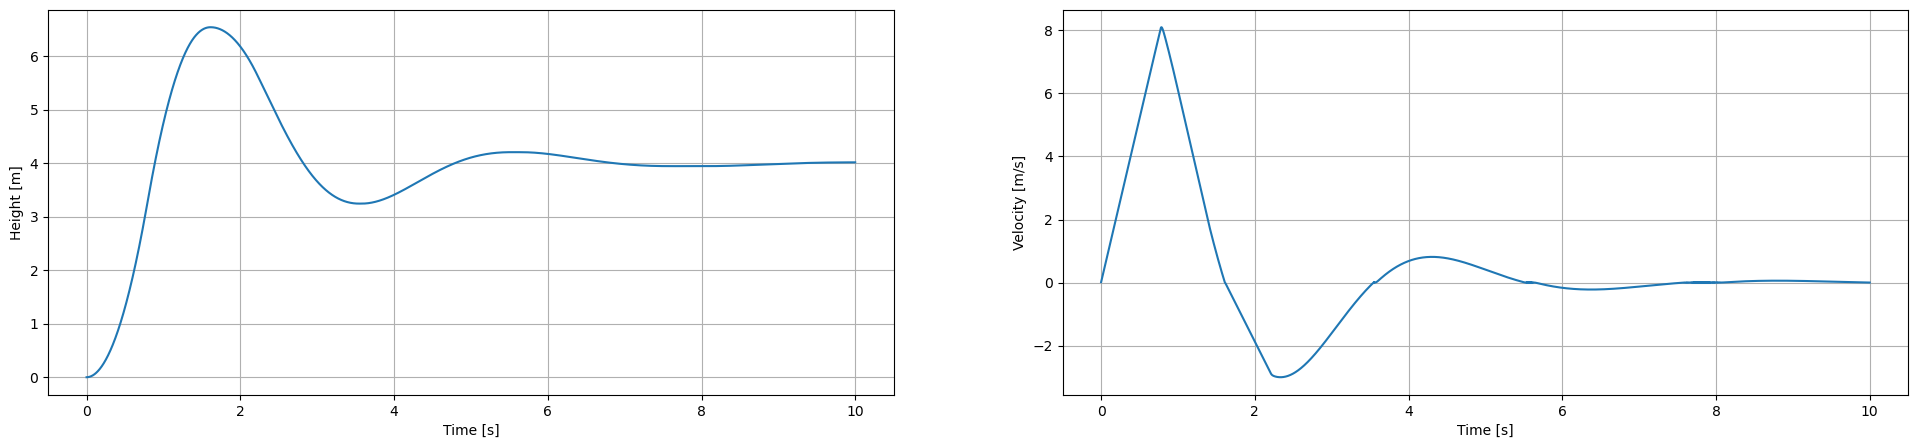

In [25]:
# Visualization

# part 3: motion
plt.figure(figsize=(24,5))
plt.subplot(121)
plt.plot(time[:-1], motion_t[0, :-1], label='x')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()


plt.subplot(122)
plt.plot(time[:-1], motion_t[1, :-1], label='v')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

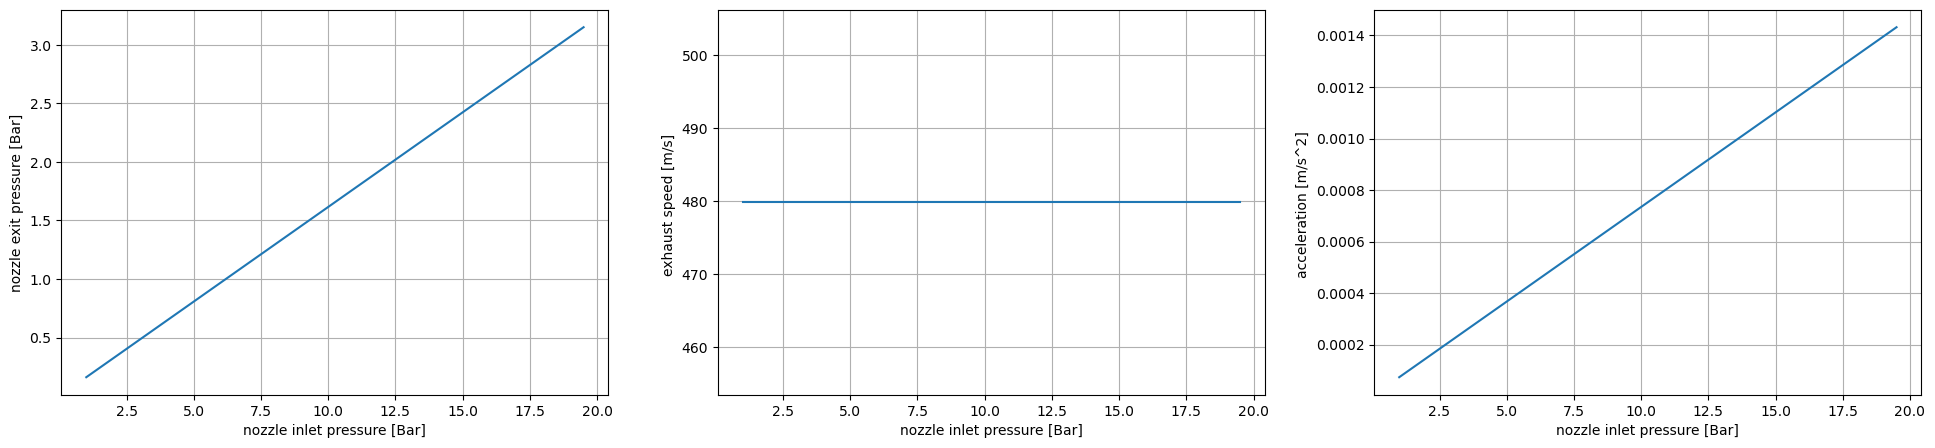

In [26]:
############################################################
'''
Side Note: discuss the nozzle mass flow rate (chocked) (dot_m) / exhaust velocity (ve) respect to nozzle inlet pressure 
'''

# Now we introduce the rocket dynamic here
############################################################

p4n=np.arange(1,20,0.25)                                                                     # assume 1-11 bar
md4n=A_throat*p4n/(np.sqrt(T_4*R/(M*gamma)))*np.power((gamma+1)/2,-(gamma+1)/(2*(gamma-1)))

# Nozzle exit
pe=p4n/np.power(1+((gamma-1)/2*Me**2), gamma/(gamma-1))                         #exit pressure (use the assumption of p_4/p_ambient>1.8)
ve=np.sqrt((2*gamma*R*T_4)/(gamma-1)/M*(1-np.power(pe/p4n,(gamma-1)/gamma)))    #exit velocity

acceleration=md4n*ve  # assume mass=1kg  -> linear relation 1

## Visualization 
plt.figure(figsize=(24,5))
plt.subplot(131)
plt.plot(p4n[:-1], pe[:-1], label='p')
plt.xlabel('nozzle inlet pressure [Bar]')
plt.ylabel('nozzle exit pressure [Bar]')
plt.grid()


plt.subplot(132)
plt.plot(p4n[:-1], ve[:-1])
plt.xlabel('nozzle inlet pressure [Bar]')
plt.ylabel('exhaust speed [m/s] ')
plt.grid()

plt.subplot(133)
plt.plot(p4n[:-1], acceleration[:-1])
plt.xlabel('nozzle inlet pressure [Bar]')
plt.ylabel('acceleration [m/s^2] ')
plt.grid()
plt.show()

In [5]:
print(md4n)

[4.83936810e-06 6.04921012e-06 7.25905214e-06 8.46889417e-06
 9.67873619e-06 1.08885782e-05 1.20984202e-05 1.33082623e-05
 1.45181043e-05 1.57279463e-05 1.69377883e-05 1.81476304e-05
 1.93574724e-05 2.05673144e-05 2.17771564e-05 2.29869985e-05
 2.41968405e-05 2.54066825e-05 2.66165245e-05 2.78263665e-05
 2.90362086e-05 3.02460506e-05 3.14558926e-05 3.26657346e-05
 3.38755767e-05 3.50854187e-05 3.62952607e-05 3.75051027e-05
 3.87149448e-05 3.99247868e-05 4.11346288e-05 4.23444708e-05
 4.35543129e-05 4.47641549e-05 4.59739969e-05 4.71838389e-05
 4.83936810e-05 4.96035230e-05 5.08133650e-05 5.20232070e-05
 5.32330490e-05 5.44428911e-05 5.56527331e-05 5.68625751e-05
 5.80724171e-05 5.92822592e-05 6.04921012e-05 6.17019432e-05
 6.29117852e-05 6.41216273e-05 6.53314693e-05 6.65413113e-05
 6.77511533e-05 6.89609954e-05 7.01708374e-05 7.13806794e-05
 7.25905214e-05 7.38003635e-05 7.50102055e-05 7.62200475e-05
 7.74298895e-05 7.86397315e-05 7.98495736e-05 8.10594156e-05
 8.22692576e-05 8.347909

In [6]:
print(ve)

[15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979 15.17455979
 15.17455979 15.17455979 15.17455979 15.17455979]
